In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture 
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [40]:
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.style.use('seaborn-v0_8-whitegrid')

### Load dataset

In [3]:
data = pd.read_csv("data.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   index                              984 non-null    int64  
 1   link                               984 non-null    object 
 2   name                               984 non-null    object 
 3   user rating                        690 non-null    float64
 4   Price (in Indian Rupees)           984 non-null    int64  
 5   Type                               984 non-null    int64  
 6   Dedicated Graphic Memory Capacity  984 non-null    float64
 7   Processor Brand                    984 non-null    int64  
 8   SSD                                984 non-null    int64  
 9   RAM (in GB)                        984 non-null    int64  
 10  RAM Type                           984 non-null    object 
 11  Expandable Memory                  984 non-null    int64  

In [5]:
print(f"Number of missing values in dataset:\n{data.isna().sum()}")

Number of missing values in dataset:
index                                  0
link                                   0
name                                   0
user rating                          294
Price (in Indian Rupees)               0
Type                                   0
Dedicated Graphic Memory Capacity      0
Processor Brand                        0
SSD                                    0
RAM (in GB)                            0
RAM Type                               0
Expandable Memory                      0
Operating System                       0
Touchscreen                            0
Screen Size (in inch)                  0
Weight (in kg)                         0
Refresh Rate                           0
screen_resolution                      0
company                                0
Storage                                0
Processor name                         0
CPU_ranking                            0
battery_backup                         0
gpu name            

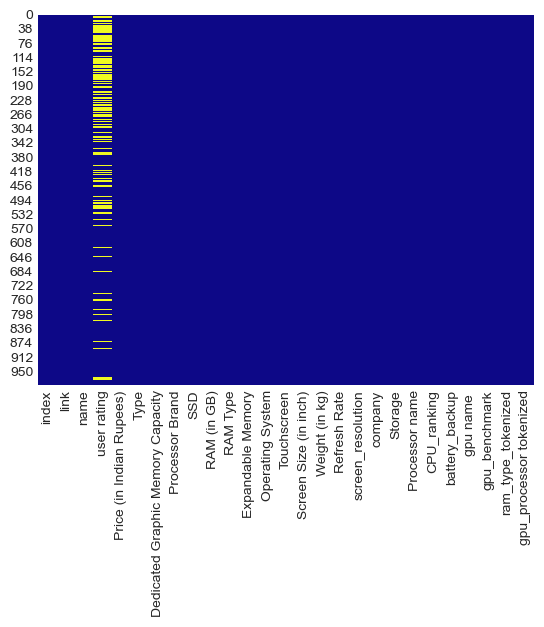

In [6]:
sns.heatmap(data.isna(), cbar=False, cmap='plasma')
plt.show()

In [7]:
print(data[:5][:].to_string())

   index                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         link                                                                                                                                                                                                             name  user rating  Price (in Indian Rupees)  Type  Dedicated Graphic Memory Capacity  Processor Brand  SSD  RAM (in GB) RAM Type  Expandable Memory  Operating System  Touchscreen  Screen Size (in inch)  Weight (in kg)  Refresh Rate  screen_resolution  company  Storage          

In [8]:
data.drop(["index"], axis=1, inplace=True)

In [9]:
print(f"Number of duplicates in dataset: {data.duplicated().sum()}")

Number of duplicates in dataset: 0


In [10]:
data.drop(["link", "name", "ram_type_tokenized", "gpu_processor tokenized"], axis=1, inplace=True)

In [11]:
print(f"Number of duplicates in dataset: {data.duplicated().sum()}")

Number of duplicates in dataset: 63


In [12]:
print(data[data.duplicated()].to_string())

     user rating  Price (in Indian Rupees)  Type  Dedicated Graphic Memory Capacity  Processor Brand  SSD  RAM (in GB) RAM Type  Expandable Memory  Operating System  Touchscreen  Screen Size (in inch)  Weight (in kg)  Refresh Rate  screen_resolution  company  Storage                 Processor name  CPU_ranking  battery_backup                   gpu name   gpu_benchmark
19           4.3                     64990     2                              0.000                1    1           16  lpddr4x                  0                 1            0                   14.0        1.370000            60               1440        6      512         intel core i5 11th gen          108             4.5               intel iris xe          17.50
20           4.3                     64990     2                              0.000                1    1           16  lpddr4x                  0                 1            0                   14.0        1.370000            60               1440        6

In [13]:
data.drop_duplicates(inplace=True)
data = data.reset_index(drop=True)
print(f"Number of duplicates in dataset: {data.duplicated().sum()}")

Number of duplicates in dataset: 0


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 921 entries, 0 to 920
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   user rating                        647 non-null    float64
 1   Price (in Indian Rupees)           921 non-null    int64  
 2   Type                               921 non-null    int64  
 3   Dedicated Graphic Memory Capacity  921 non-null    float64
 4   Processor Brand                    921 non-null    int64  
 5   SSD                                921 non-null    int64  
 6   RAM (in GB)                        921 non-null    int64  
 7   RAM Type                           921 non-null    object 
 8   Expandable Memory                  921 non-null    int64  
 9   Operating System                   921 non-null    int64  
 10  Touchscreen                        921 non-null    int64  
 11  Screen Size (in inch)              921 non-null    float64

### Explore features

In [15]:
numerical_features = ["user rating", "Price (in Indian Rupees)", "Dedicated Graphic Memory Capacity", "RAM (in GB)",
                      "Screen Size (in inch)", "Weight (in kg)", "Refresh Rate", "screen_resolution", "Storage", "CPU_ranking",
                      "battery_backup", "gpu_benchmark"]
binary_features = ["SSD", "Expandable Memory", "Touchscreen"]
already_encoded_categorical_features = ["Type", "Processor Brand", "Operating System", "company"]
categorical_features = ["RAM Type", "Processor name", "gpu name "]

In [16]:
data[numerical_features].describe()

,user rating,Price (in Indian Rupees),Dedicated Graphic Memory Capacity,RAM (in GB),Screen Size (in inch),Weight (in kg),Refresh Rate,screen_resolution,Storage,CPU_ranking,battery_backup,gpu_benchmark
count,647.000000,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000
mean,4.195054,69461.299674,1.347058,10.297503,14.849338,1.680124,50.633008,1087.426710,653.155266,232.894680,4.414767,40.424723
std,0.452451,38375.095446,2.238270,4.847510,1.020726,0.400689,21.187670,190.126964,333.345393,210.759189,0.262842,42.509085
min,1.800000,15990.000000,0.000000,4.000000,11.600000,0.780000,1.000000,720.000000,32.000000,4.000000,4.000000,1.000000
25%,4.000000,43430.000000,0.000000,8.000000,14.000000,1.400000,60.000000,1080.000000,512.000000,87.000000,4.500000,5.050000
50%,4.300000,59990.000000,0.000000,8.000000,15.600000,1.650000,60.000000,1080.000000,512.000000,108.000000,4.500000,17.500000
75%,4.500000,81399.000000,4.000000,16.000000,15.600000,1.850000,60.000000,1080.000000,1000.000000,362.000000,4.500000,72.600000
max,5.000000,301990.000000,16.000000,32.000000,17.300000,2.900000,60.000000,2160.000000,2000.000000,907.000000,5.000000,233.000000


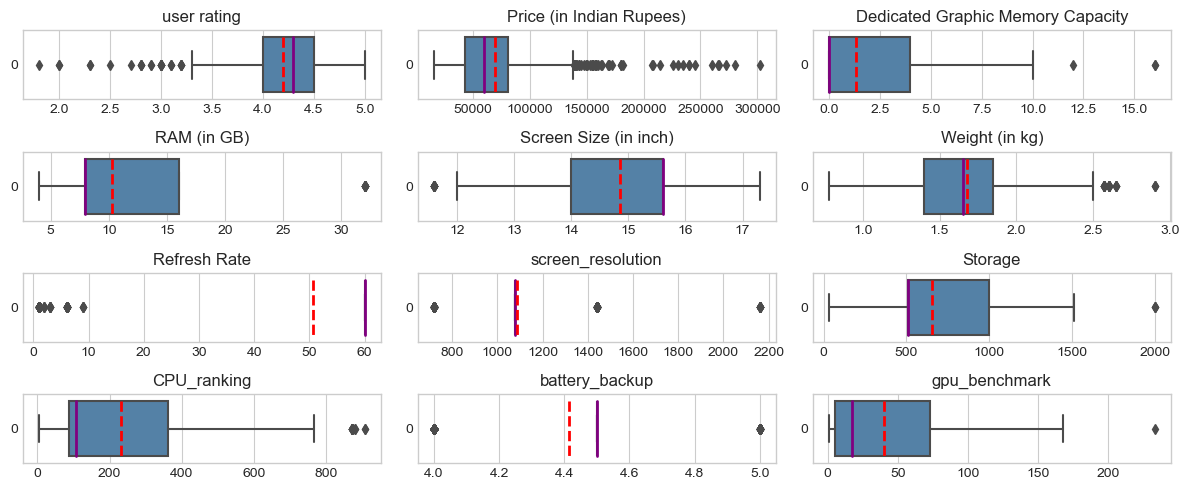

In [17]:
plt.figure(figsize=(12, 5))

for i, feature in enumerate(numerical_features):
    plt.subplot(4, 3, i+1)
    plt.title(feature)
    sns.boxplot(data[feature], orient='h', color="steelblue", showmeans=True, meanline=True,
                    medianprops={'linewidth': 2, 'color': 'purple'},
                    meanprops={'linewidth': 2, 'color': 'red'})

plt.tight_layout()

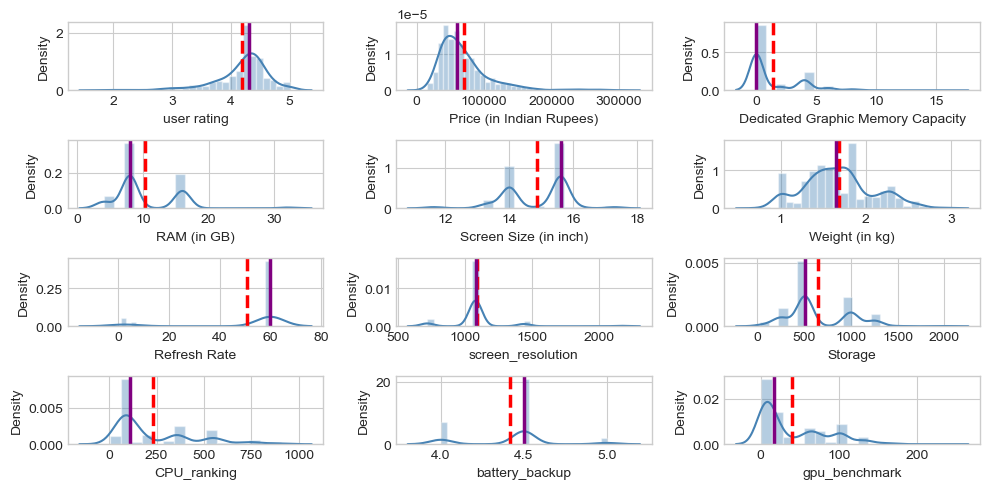

In [18]:
plt.figure(figsize=(10, 5))

for i, feature in enumerate(numerical_features):
    plt.subplot(4, 3, i+1)
    sns.distplot(data[feature], color="steelblue")
    plt.axvline(x=data[feature].mean(), c='red', ls='--', lw=2.5)
    plt.axvline(x=data[feature].median(), c='purple', ls='-', lw=2.5)

plt.tight_layout()

In [19]:
data[numerical_features].skew()

user rating                         -1.541544
Price (in Indian Rupees)             2.183087
Dedicated Graphic Memory Capacity    1.829708
RAM (in GB)                          1.362565
Screen Size (in inch)               -0.561022
Weight (in kg)                       0.338179
Refresh Rate                        -1.827232
screen_resolution                    2.152736
Storage                              0.660368
CPU_ranking                          1.217762
battery_backup                      -0.168126
gpu_benchmark                        1.027309
dtype: float64

In [20]:
data[numerical_features].mode()

,user rating,Price (in Indian Rupees),Dedicated Graphic Memory Capacity,RAM (in GB),Screen Size (in inch),Weight (in kg),Refresh Rate,screen_resolution,Storage,CPU_ranking,battery_backup,gpu_benchmark
0,4.3,40990,0.0,8,15.6,1.8,60,1080,512,108,4.5,5.05


In [21]:
for i, feature in enumerate(numerical_features):
    unique_values = data[feature].unique()
    print(f"{feature}: {len(unique_values)} unique values")

user rating: 29 unique values
Price (in Indian Rupees): 433 unique values
Dedicated Graphic Memory Capacity: 10 unique values
RAM (in GB): 4 unique values
Screen Size (in inch): 21 unique values
Weight (in kg): 99 unique values
Refresh Rate: 6 unique values
screen_resolution: 4 unique values
Storage: 11 unique values
CPU_ranking: 48 unique values
battery_backup: 3 unique values
gpu_benchmark: 49 unique values


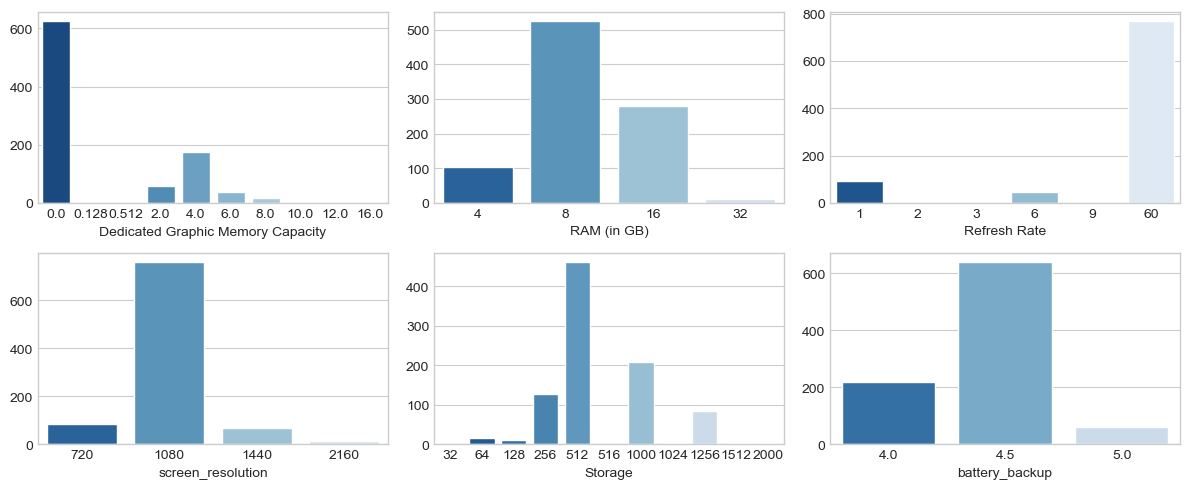

In [22]:
plt.figure(figsize=(12, 5))

for i, feature in enumerate(["Dedicated Graphic Memory Capacity", "RAM (in GB)", "Refresh Rate", "screen_resolution", "Storage", "battery_backup"]):
    plt.subplot(2, 3, i+1)
    counts = data[feature].value_counts()
    sns.barplot(x=counts.index, y=counts.values, palette="Blues_r")

plt.tight_layout()

In [23]:
data.drop(["Refresh Rate"], axis=1, inplace=True)
numerical_features.remove("Refresh Rate")
data['Storage'].replace(1000, 1024, inplace=True)
data['Storage'].replace(1256, 1024, inplace=True)
data['Storage'].replace(516, 512, inplace=True)
data['Storage'].replace(1512, 1536, inplace=True)
data['Storage'].replace(2000, 2048, inplace=True)

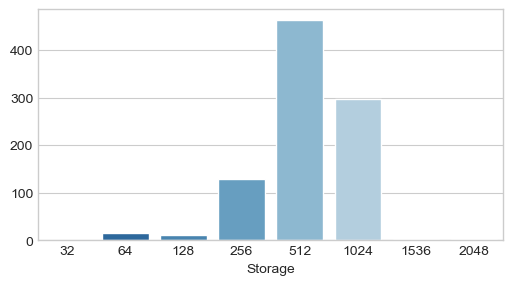

In [25]:
plt.figure(figsize=(6, 3))
counts = data["Storage"].value_counts()
sns.barplot(x=counts.index, y=counts.values, palette="Blues_r")
plt.show()

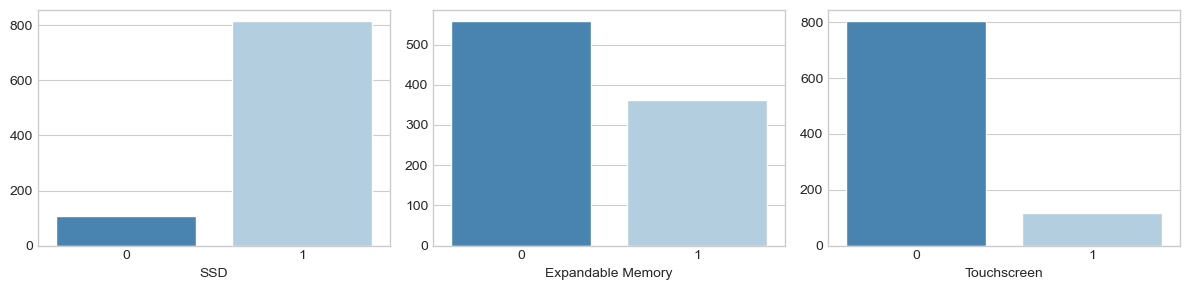

In [26]:
plt.figure(figsize=(12, 3))

for i, feature in enumerate(binary_features):
    plt.subplot(1, 3, i+1)
    counts = data[feature].value_counts()
    sns.barplot(x=counts.index, y=counts.values, palette="Blues_r")

plt.tight_layout()

In [27]:
for i, feature in enumerate(categorical_features):
    unique_values = data[feature].unique()
    print(f"{feature}: {len(unique_values)} unique values")
    print(unique_values)

RAM Type: 8 unique values
['ddr5' 'ddr4' 'lpddr4x' 'lpddr5' 'lpddr4' 'unified memory' 'ddr3'
 'lpddr3']
Processor name: 61 unique values
['intel core i9 12th gen' 'amd ryzen 7 octa core'
 'amd ryzen 7 octa core 5th gen' 'intel core i5 11th gen'
 'intel core i7 11th gen' 'intel celeron dual core'
 'intel core i5 10th gen' 'intel pentium silver' 'amd athlon dual core'
 'amd ryzen 7 dual core 7th gen' 'amd ryzen 3 quad core 3rd gen'
 'amd ryzen 9 octa core 5th gen' 'intel core i3 11th gen'
 'amd ryzen 5 hexa core' 'intel core i5 12th gen' 'intel core i7 12th gen'
 'amd ryzen 5 quad core' 'amd ryzen 7 hexa core 10th gen'
 'amd ryzen 9 octa core 10th gen' 'amd ryzen 7 quad core 10th gen'
 'intel core i3 10th gen' 'amd ryzen 5 quad core 3rd gen'
 'intel pentium quad core' 'intel celeron quad core'
 'amd ryzen 7 quad core' 'intel core i9 11th gen'
 'qualcomm snapdragon 7c gen 2' 'amd ryzen 5 dual core'
 'amd ryzen 3 dual core' 'intel pentium quad core 10th gen'
 'intel core i7 10th gen' 'amd 

In [28]:
data.drop(["Processor name", "gpu name "], axis=1, inplace=True)
categorical_features.remove("Processor name")
categorical_features.remove("gpu name ")

In [29]:
nan_data_ind = data[data['user rating'].isnull()].index.tolist()
imp = IterativeImputer(max_iter=10, random_state=42)
data[numerical_features+binary_features] = imp.fit_transform(data[numerical_features+binary_features])

In [30]:
user_ratings_nan = data["user rating"].isna().sum()
print(f"Number of missing user rating values in dataset:\n{user_ratings_nan}")

Number of missing user rating values in dataset:
0


In [31]:
print(data.iloc[nan_data_ind]['user rating'].to_string())

1      4.593299
2      4.449366
3      4.433704
4      4.281067
5      4.232626
7      4.233888
11     4.326941
12     4.386722
13     4.278835
15     4.306153
16     4.536857
17     4.235955
19     4.437952
23     4.282358
24     4.269530
25     4.293700
26     4.299536
27     4.282358
28     4.386034
29     4.229874
30     4.473892
31     4.570842
32     4.289314
33     4.140955
34     4.502528
35     4.193371
37     4.494023
38     4.428214
39     4.583997
40     4.196631
41     4.378674
42     4.336591
43     4.448496
44     4.429139
46     4.046183
48     4.239574
49     4.350994
50     4.299068
51     4.279630
52     4.331169
53     4.012454
54     4.043387
55     4.424552
57     4.263225
58     4.179080
59     4.454808
60     4.312562
61     4.193575
62     4.250166
63     4.062780
64     4.165683
65     4.427644
66     4.264683
67     4.415519
68     4.476172
69     4.415999
73     4.249446
75     4.052183
78     4.290585
80     4.188972
81     4.106324
85     4.362475
86     4

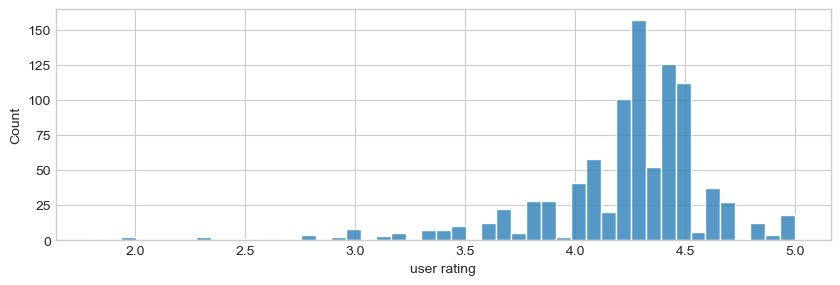

In [33]:
plt.figure(figsize=(10, 3))
sns.histplot(data["user rating"])
plt.show()

In [34]:
for i, feature in enumerate(already_encoded_categorical_features):
    unique_values = data[feature].unique()
    print(f"{feature}: {len(unique_values)} unique values")
    print(unique_values)

Type: 4 unique values
[1 2 3 4]
Processor Brand: 5 unique values
[1 2 3 4 5]
Operating System: 5 unique values
[1 2 3 4 5]
company: 16 unique values
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


In [35]:
type_values = ["gaming laptop", "thin and light laptop", "2 in 1 laptop", "notebook"]
processor_brand_values = ["intel", "amd", "qualcomm", "apple", "mediatek"]
operating_system_values = ["windows", "chrome os", "dos", "mac", "ubuntu"]
company_values = ["asus", "hp", "lenovo", "dell", "msi", "realme", "avita", "acer", "samsung", "infinix", "lg",
                  "apple", "nokia", "redmibook", "mi", "vaio"]
values = [type_values, processor_brand_values, operating_system_values, company_values]

for feature, replace_values in zip(already_encoded_categorical_features, values):
    unique_values = data[feature].unique()
    for value in unique_values:
        data[feature].replace(value, replace_values[value-1], inplace=True)

In [36]:
for i, feature in enumerate(already_encoded_categorical_features):
    unique_values = data[feature].unique()
    print(f"{feature}: {len(unique_values)} unique values")
    print(unique_values)

Type: 4 unique values
['gaming laptop' 'thin and light laptop' '2 in 1 laptop' 'notebook']
Processor Brand: 5 unique values
['intel' 'amd' 'qualcomm' 'apple' 'mediatek']
Operating System: 5 unique values
['windows' 'chrome os' 'dos' 'mac' 'ubuntu']
company: 16 unique values
['asus' 'hp' 'lenovo' 'dell' 'msi' 'realme' 'avita' 'acer' 'samsung'
 'infinix' 'lg' 'apple' 'nokia' 'redmibook' 'mi' 'vaio']


In [37]:
categorical_features = categorical_features + already_encoded_categorical_features
encoder = OneHotEncoder(sparse=False)
one_hot_encoded = encoder.fit_transform(data[categorical_features])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_features))

data = pd.concat([data, one_hot_df], axis=1)
data.drop(categorical_features, axis=1, inplace=True)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 921 entries, 0 to 920
Data columns (total 52 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   user rating                        921 non-null    float64
 1   Price (in Indian Rupees)           921 non-null    float64
 2   Dedicated Graphic Memory Capacity  921 non-null    float64
 3   SSD                                921 non-null    float64
 4   RAM (in GB)                        921 non-null    float64
 5   Expandable Memory                  921 non-null    float64
 6   Touchscreen                        921 non-null    float64
 7   Screen Size (in inch)              921 non-null    float64
 8   Weight (in kg)                     921 non-null    float64
 9   screen_resolution                  921 non-null    float64
 10  Storage                            921 non-null    float64
 11  CPU_ranking                        921 non-null    float64

### Clustering

In [41]:
data_numerical = data[numerical_features + binary_features]
data_numerical_without_user_rating = data_numerical.drop(["user rating"], axis=1)
data_with_categorical_features = data

In [42]:
scaler = StandardScaler()
scaled_features_numerical = scaler.fit_transform(data_numerical)
scaled_features_numerical_without_user_ratings = scaler.fit_transform(data_numerical_without_user_rating)
scaled_features_with_categorical = scaler.fit_transform(data_with_categorical_features)

#### K-means

##### Only numerical features (with user rating)

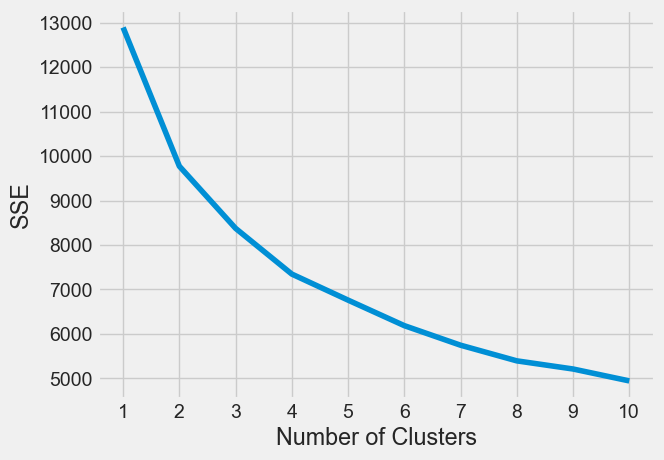

In [43]:
kmeans_kwargs = {"init": "random", "n_init": 10, "max_iter": 300, "random_state": 42}
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features_numerical)
    sse.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

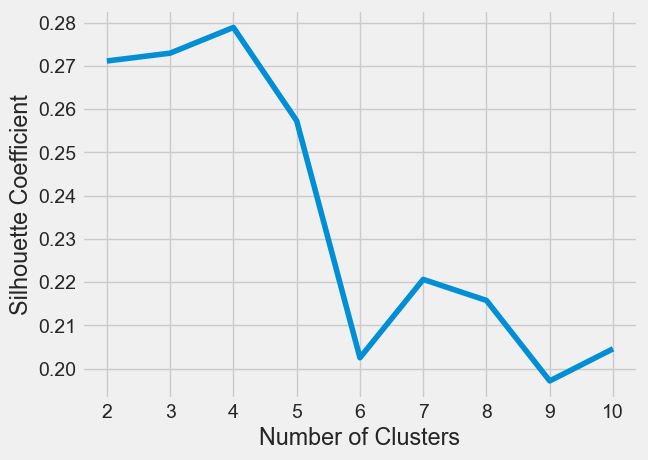

In [44]:
silhouette_coefficients = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features_numerical)
    score = silhouette_score(scaled_features_numerical, kmeans.labels_)
    silhouette_coefficients.append(score)

plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

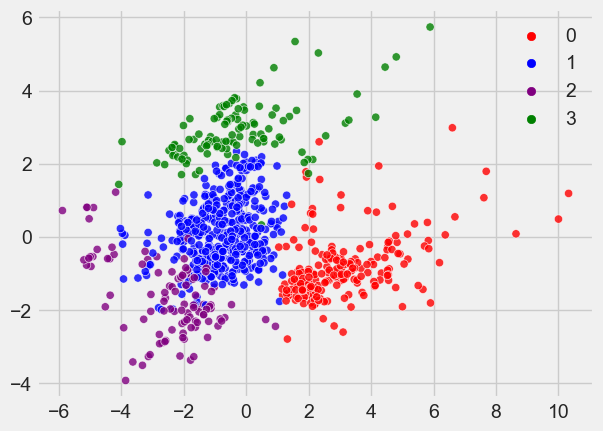

In [45]:
def do_kmeans(X, n_clusters):
    kmeans = KMeans(n_clusters)
    clusters = kmeans.fit_predict(X)
    
    return clusters

clusters = do_kmeans(scaled_features_numerical, 4)

pca = PCA(n_components=2)
pcs = pca.fit_transform(scaled_features_numerical)
pc1_values = pcs[:,0]
pc2_values = pcs[:,1]

colors = ['red', 'blue', 'purple', 'green', 'black', 'yellow']
sns.scatterplot(x=pc1_values, y=pc2_values, hue=clusters, palette=colors, alpha=0.8)
plt.show()

##### Only numerical features (without user rating)

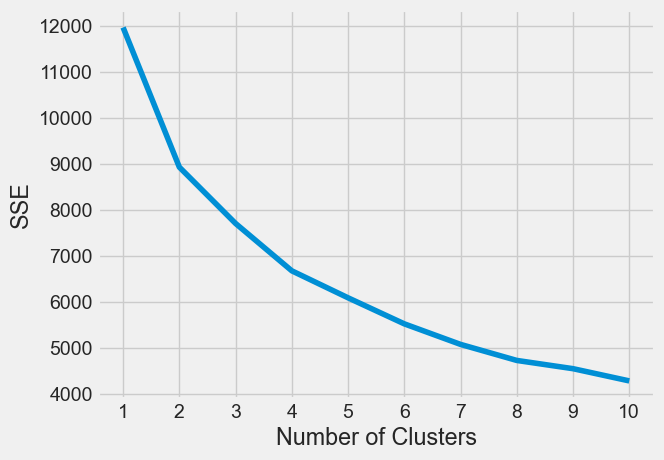

In [46]:
kmeans_kwargs = {"init": "random", "n_init": 10, "max_iter": 300, "random_state": 42}
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features_numerical_without_user_ratings)
    sse.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

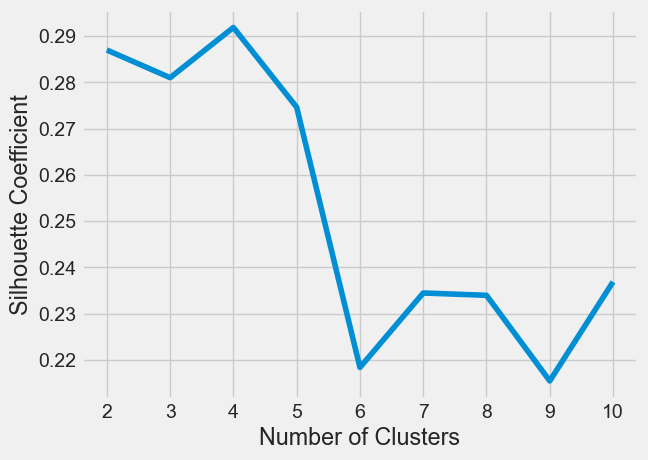

In [47]:
silhouette_coefficients = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features_numerical_without_user_ratings)
    score = silhouette_score(scaled_features_numerical_without_user_ratings, kmeans.labels_)
    silhouette_coefficients.append(score)

plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

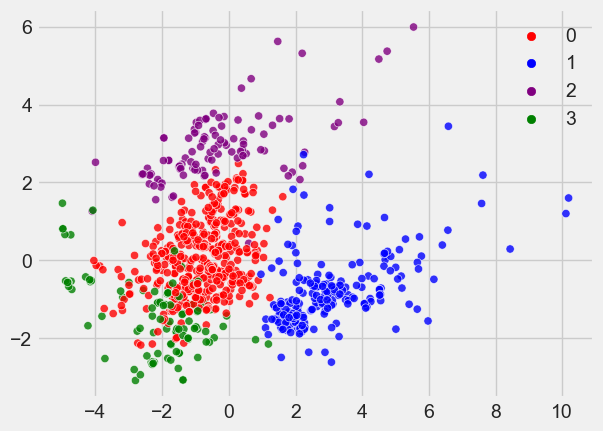

In [49]:
clusters = do_kmeans(scaled_features_numerical_without_user_ratings, 4)

pca = PCA(n_components=2)
pcs = pca.fit_transform(scaled_features_numerical_without_user_ratings)
pc1_values = pcs[:,0]
pc2_values = pcs[:,1]

colors = ['red', 'blue', 'purple', 'green', 'black', 'yellow']
sns.scatterplot(x=pc1_values, y=pc2_values, hue=clusters, palette=colors, alpha=0.8)
plt.show()

##### Numerical + categorical features

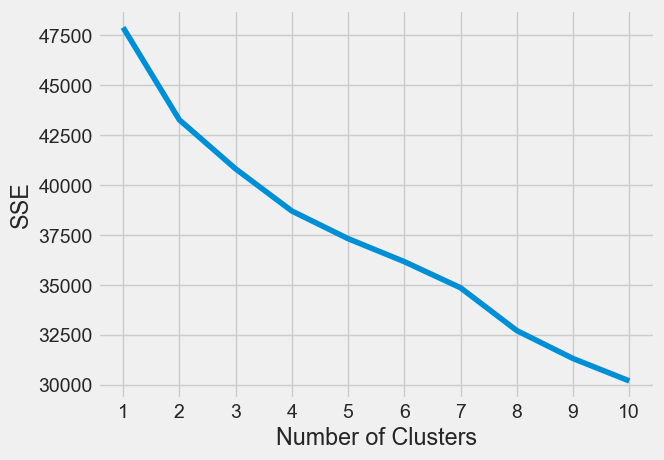

In [50]:
kmeans_kwargs = {"init": "random", "n_init": 10, "max_iter": 300, "random_state": 42}
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features_with_categorical)
    sse.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

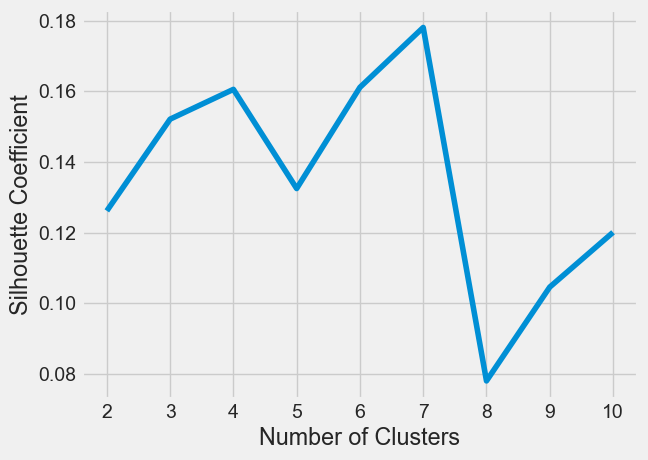

In [51]:
silhouette_coefficients = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features_with_categorical)
    score = silhouette_score(scaled_features_with_categorical, kmeans.labels_)
    silhouette_coefficients.append(score)

plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

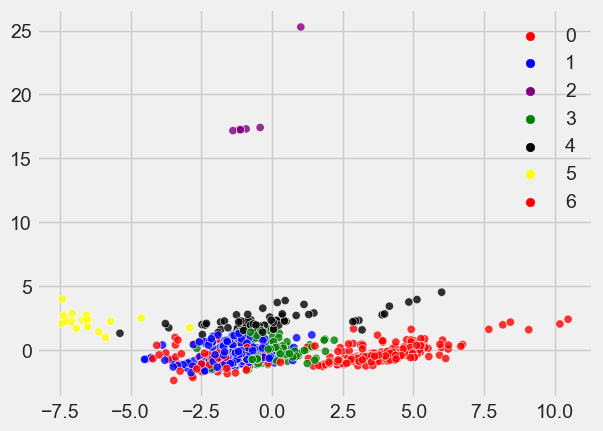

In [52]:
clusters = do_kmeans(scaled_features_with_categorical, 7)

pca = PCA(n_components=2)
pcs = pca.fit_transform(scaled_features_with_categorical)
pc1_values = pcs[:,0]
pc2_values = pcs[:,1]

colors = ['red', 'blue', 'purple', 'green', 'black', 'yellow']
sns.scatterplot(x=pc1_values, y=pc2_values, hue=clusters, palette=colors, alpha=0.8)
plt.show()

#### Agglomerative Hierarchical Clustering

##### Only numerical features (with user rating)

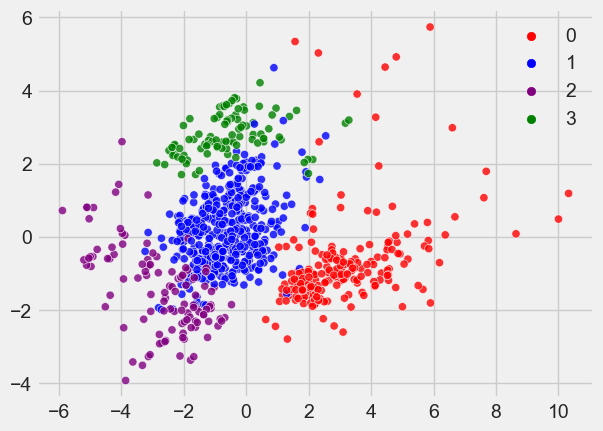

In [53]:
def doAgglomerative(X, nclust):
    model = AgglomerativeClustering(n_clusters=nclust, affinity = 'euclidean', linkage = 'ward')
    clusters = model.fit_predict(X)
    
    return clusters

clusters = doAgglomerative(scaled_features_numerical, 4)

pca = PCA(n_components=2)
pcs = pca.fit_transform(scaled_features_numerical)
pc1_values = pcs[:,0]
pc2_values = pcs[:,1]

colors = ['red', 'blue', 'purple', 'green', 'black', 'yellow']
sns.scatterplot(x=pc1_values, y=pc2_values, hue=clusters, palette=colors, alpha=0.8)
plt.show()

##### Only numerical features (without user rating)

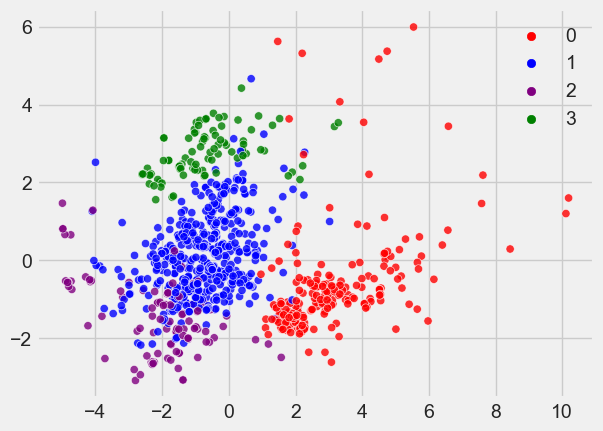

In [54]:
clusters = doAgglomerative(scaled_features_numerical_without_user_ratings, 4)

pca = PCA(n_components=2)
pcs = pca.fit_transform(scaled_features_numerical_without_user_ratings)
pc1_values = pcs[:,0]
pc2_values = pcs[:,1]

colors = ['red', 'blue', 'purple', 'green', 'black', 'yellow']
sns.scatterplot(x=pc1_values, y=pc2_values, hue=clusters, palette=colors, alpha=0.8)
plt.show()

##### Numerical + categorical features

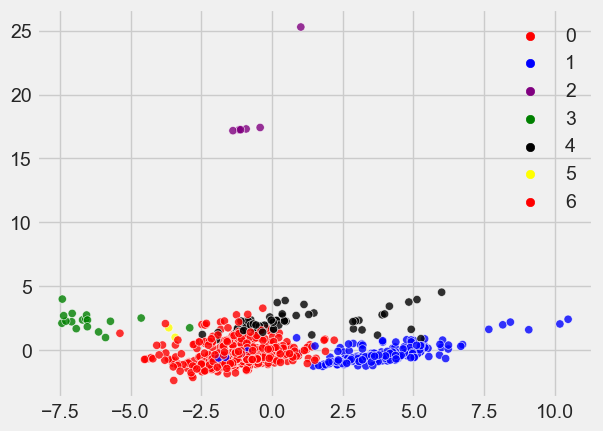

In [56]:
clusters = doAgglomerative(scaled_features_with_categorical, 7)

pca = PCA(n_components=2)
pcs = pca.fit_transform(scaled_features_with_categorical)
pc1_values = pcs[:,0]
pc2_values = pcs[:,1]

colors = ['red', 'blue', 'purple', 'green', 'black', 'yellow']
sns.scatterplot(x=pc1_values, y=pc2_values, hue=clusters, palette=colors, alpha=0.8)
plt.show()

#### GaussianMixture

##### Only numerical features (with user rating)

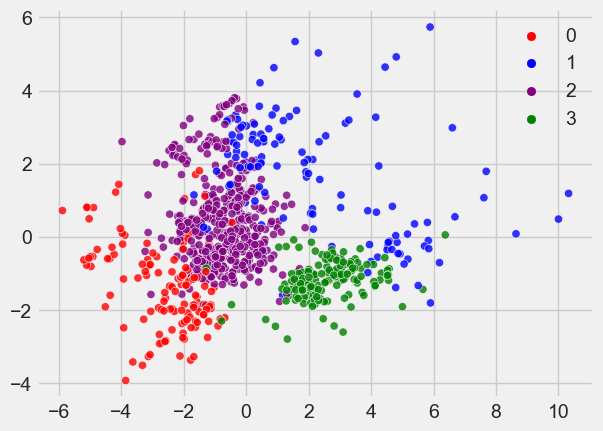

In [57]:
def doGMM(X, nclust):
    model = GaussianMixture(n_components=nclust, init_params='kmeans')
    clusters = model.fit_predict(X)
    
    return clusters

clusters = doGMM(scaled_features_numerical, 4)

pca = PCA(n_components=2)
pcs = pca.fit_transform(scaled_features_numerical)
pc1_values = pcs[:,0]
pc2_values = pcs[:,1]

colors = ['red', 'blue', 'purple', 'green', 'black', 'yellow']
sns.scatterplot(x=pc1_values, y=pc2_values, hue=clusters, palette=colors, alpha=0.8)
plt.show()

##### Only numerical features (without user rating)

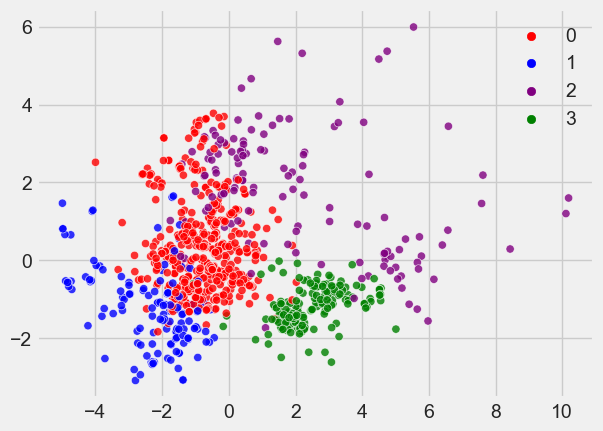

In [59]:
clusters = doGMM(scaled_features_numerical_without_user_ratings, 4)

pca = PCA(n_components=2)
pcs = pca.fit_transform(scaled_features_numerical_without_user_ratings)
pc1_values = pcs[:,0]
pc2_values = pcs[:,1]

colors = ['red', 'blue', 'purple', 'green', 'black', 'yellow']
sns.scatterplot(x=pc1_values, y=pc2_values, hue=clusters, palette=colors, alpha=0.8)
plt.show()

##### Numerical + categorical features

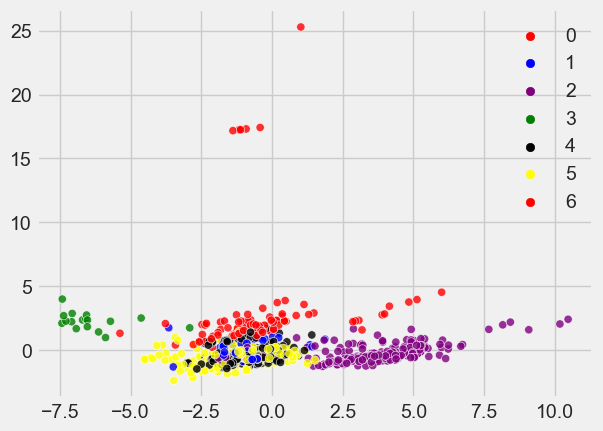

In [60]:
clusters = doGMM(scaled_features_with_categorical, 7)

pca = PCA(n_components=2)
pcs = pca.fit_transform(scaled_features_with_categorical)
pc1_values = pcs[:,0]
pc2_values = pcs[:,1]

colors = ['red', 'blue', 'purple', 'green', 'black', 'yellow']
sns.scatterplot(x=pc1_values, y=pc2_values, hue=clusters, palette=colors, alpha=0.8)
plt.show()

#### DBSCAN

##### Only numerical features (with user rating)

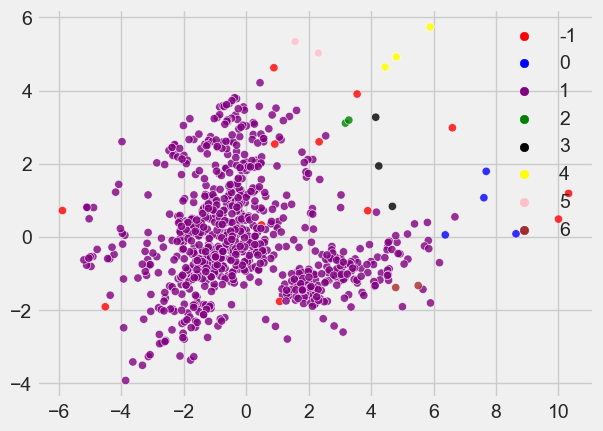

In [67]:
def doDBScan(X):
    model = DBSCAN(eps=3.2, min_samples=2)
    clusters = model.fit_predict(X)
    
    return clusters

clusters = doDBScan(scaled_features_numerical)

pca = PCA(n_components=2)
pcs = pca.fit_transform(scaled_features_numerical)
pc1_values = pcs[:,0]
pc2_values = pcs[:,1]

colors = ['red', 'blue', 'purple', 'green', 'black', 'yellow', 'pink', 'brown', 'orange']
sns.scatterplot(x=pc1_values, y=pc2_values, hue=clusters, palette=colors, alpha=0.8)
plt.show()

##### Only numerical features (without user rating)

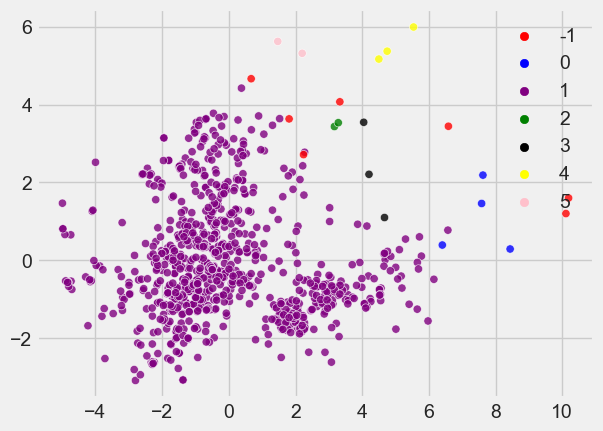

In [68]:
clusters = doDBScan(scaled_features_numerical_without_user_ratings)

pca = PCA(n_components=2)
pcs = pca.fit_transform(scaled_features_numerical_without_user_ratings)
pc1_values = pcs[:,0]
pc2_values = pcs[:,1]

colors = ['red', 'blue', 'purple', 'green', 'black', 'yellow', 'pink', 'brown', 'orange']
sns.scatterplot(x=pc1_values, y=pc2_values, hue=clusters, palette=colors, alpha=0.8)
plt.show()

##### Numerical + categorical features

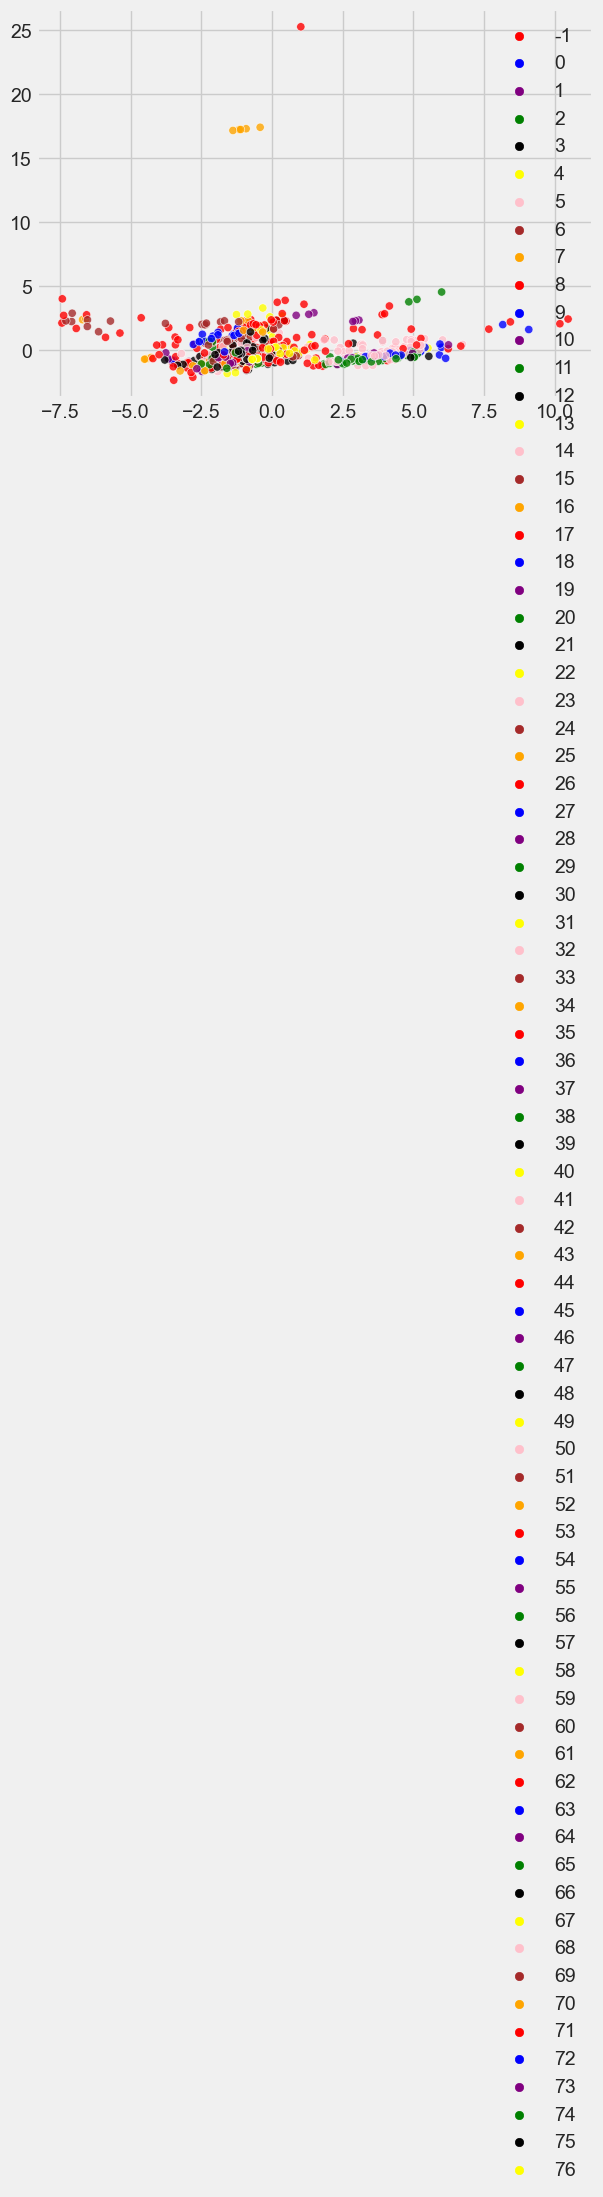

In [69]:
clusters = doDBScan(scaled_features_with_categorical)

pca = PCA(n_components=2)
pcs = pca.fit_transform(scaled_features_with_categorical)
pc1_values = pcs[:,0]
pc2_values = pcs[:,1]

colors = ['red', 'blue', 'purple', 'green', 'black', 'yellow', 'pink', 'brown', 'orange']
sns.scatterplot(x=pc1_values, y=pc2_values, hue=clusters, palette=colors, alpha=0.8)
plt.show()

#### HDBSCAN

#### OPTICS

#### BIRCH

#### Spectral clustering

#### Mean Shift

#### Affinity Propagation